In [1]:
import numpy as np
import pandas as pd
# from lightgbm import LGBMRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score as r2

# Load train data

In [2]:
train_df = pd.read_csv('train.csv', sep=',')

train_df.head(10)  

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [3]:
train_df.shape

(10000, 20)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [5]:
train_df.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [6]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


# Load test data

In [7]:
test_df = pd.read_csv('test.csv', sep=',')

test_df.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
5,7633,53,1.0,40.675627,NaN,1.0,21,21.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B
6,13329,23,2.0,68.099538,64.843025,1.0,2,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
7,5502,32,2.0,48.193897,32.857644,6.0,5,14.0,1972,0.135650,B,B,46,7960,6,350.0,3,11,B
8,4220,96,3.0,72.277106,45.968758,9.0,17,17.0,1997,0.041116,B,B,53,14892,4,NaN,1,4,B
9,11538,6,3.0,80.219400,47.660260,9.0,13,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B


# Try on train data

### Data preparing function

In [8]:
def data_preparing(X, medians, y=None):
    
    label_to_num_dict = {'A': 0, 'B': 1}  # dict for transform categorical data
    
    X.drop('Id', axis=1, inplace=True)  # remove Id column
    X.drop('Healthcare_1', axis=1, inplace=True)  # remove Healthcare_1 column
    
#     Looks like Shops_2 and Ecology_3 are usefull features (got emperical)
#     X.drop('Shops_2', axis=1, inplace=True)  
#     X.drop('Ecology_3', axis=1, inplace=True) 
    X.drop('Ecology_2', axis=1, inplace=True)  # and looks like without ecology_2 results are better

# I think not need because 0 rooms can be in studio-flat
#     X.loc[X['Rooms'] < 1, 'Rooms'] = 1  # min num of rooms is 1
    X.loc[X['Rooms'] > 5, 'Rooms'] = medians['Rooms']  # more than 5 rooms looks like ejection
    
    X.loc[X['KitchenSquare'] < 3, 'KitchenSquare'] = 3  # KitchenSquare (looks like ejection)
    # when KS > S set KS as S - LS if LS < S
    X.loc[(X['KitchenSquare'] > X['Square']) & (X['Square'] > X['LifeSquare']), 'KitchenSquare'] = X['Square'] - X['LifeSquare']
    # when KS > S set KS as S if LS > S or LS is None
    X.loc[X['KitchenSquare'] > X['Square'], 'KitchenSquare'] = X['Square']
    
    X.loc[X['HouseFloor'] < 1, 'HouseFloor'] = medians['HouseFloor']  # floor can't be less than 1  
    # floor can't be greater than HouseFloor
    X.loc[X['Floor'] > X['HouseFloor'], 'Floor'] = X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor']
    # floor can't be less than 1
    X.loc[X['Floor'] < 1, 'Floor'] = 1
    
    # HouseYear can't be greater then current year
    X.loc[X['HouseYear'] > 2020, 'HouseYear'] = 2020
    
#     Looks like LifeSquare is usefull feature (emperically)
#     X.drop('LifeSquare', axis=1, inplace=True) 
    X.loc[X['LifeSquare'].isnull(), 'LifeSquare'] = medians['LifeSquare']  # set median if None
#     if greater than S-KS set as S-KS
    X.loc[X['LifeSquare'] > (X['Square'] - X['KitchenSquare']), 'LifeSquare'] = X['Square'] - X['KitchenSquare']
    
#     X['Ecology_2'] = X['Ecology_2'].map(label_to_num_dict)  # already dropped
    X['Ecology_3'] = X['Ecology_3'].map(label_to_num_dict)  # transform categorical
    X['Shops_2'] = X['Shops_2'].map(label_to_num_dict)
    
#     Looks like usefull feature
    X['KitchenSquare_relative'] = X['KitchenSquare']/X['Square']
#     Unlike KitchenSquare_relative (emperically)
#     X['RoomsMedSquare'] = X['LifeSquare']/(X['Rooms'] + 1)
#     X['Floore_relative'] = X['Floor']/X['HouseFloor']

    med_price_by_district = None
    med_price_by_district_rooms = None
    if y is not None:
        X_local = X.copy()
        X_local['Price'] = y
        
#         mean meter price by district
        med_price_by_district = X_local.groupby(['DistrictId'], as_index=False).agg({'Price':'sum', 'Square':'sum'})
        med_price_by_district['MedMeterPriceByDistr'] = med_price_by_district['Price'] / med_price_by_district['Square']
        med_price_by_district.drop('Price', axis=1, inplace=True)
        med_price_by_district.drop('Square', axis=1, inplace=True)
           
#         mean meter price by district and rooms (unusefull)
#         med_price_by_district_rooms = X_local.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'sum', 'Square':'sum'})
#         med_price_by_district_rooms['MedMeterPriceByDistrRooms'] = med_price_by_district_rooms['Price'] / med_price_by_district_rooms['Square']
#         med_price_by_district_rooms.drop('Price', axis=1, inplace=True)
#         med_price_by_district_rooms.drop('Square', axis=1, inplace=True)

    return med_price_by_district, med_price_by_district_rooms

### Shuffle data

In [9]:
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)
# train_df = train_df.sample(frac=1).reset_index(drop=True)
train_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,3702,21,2.0,48.812195,34.679779,5.0,5,5.0,1963,0.034331,B,B,25,5487,3,NaN,0,4,B,181530.459031
1,12848,61,3.0,81.103039,49.310278,8.0,4,4.0,1960,0.298205,B,B,16,4048,3,NaN,1,3,B,260456.004692
2,2239,6,3.0,82.882978,3.977650,1.0,8,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,219945.304640
3,15611,23,1.0,33.863324,29.993297,0.0,5,4.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,66883.280318
4,5634,52,1.0,43.095135,NaN,1.0,10,17.0,1977,0.371149,B,B,34,7065,1,750.0,2,5,B,114086.065201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10013,30,2.0,62.219340,62.405338,1.0,4,2.0,2015,0.000078,B,B,22,6398,141,1046.0,3,23,B,150136.610509
9996,6431,25,3.0,85.790813,NaN,1.0,9,25.0,2018,0.069753,B,B,53,13670,4,NaN,1,11,B,328680.869407
9997,14239,1,3.0,83.225854,NaN,1.0,13,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,255102.406709
9998,5487,94,3.0,51.354934,36.538453,5.0,1,9.0,1973,0.127376,B,B,43,8429,3,NaN,3,9,B,182236.048759


### Split data to train and target and prepare train

In [10]:
X = train_df[train_df.columns[:-1]].copy()
y = train_df['Price'].copy()
train_medians = X.median()

med_price_distr, med_price_distr_rooms = data_preparing(X, train_medians, y)
X = pd.merge(X, med_price_distr, on='DistrictId', how='left')
# didn't give better score
# X['PriceBasedOnMeterPrice'] = X['MedMeterPriceByDistr'] * X['Square']
# X.drop('MedMeterPriceByDistr', axis=1, inplace=True)
# X = pd.merge(X, med_price_distr_rooms, on=['DistrictId', 'Rooms'], how='left')
X.drop('DistrictId', axis=1, inplace=True)
X

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,KitchenSquare_relative,MedMeterPriceByDistr
0,2.0,48.812195,34.679779,5.0,5.0,5.0,1963,0.034331,1,25,5487,3,0,4,1,0.102433,4062.599773
1,3.0,81.103039,49.310278,8.0,4.0,4.0,1960,0.298205,1,16,4048,3,1,3,1,0.098640,4291.717138
2,3.0,82.882978,3.977650,3.0,8.0,17.0,1977,0.243205,1,5,1564,0,0,0,1,0.036196,2866.703578
3,1.0,33.863324,29.993297,3.0,4.0,4.0,1977,0.034656,1,0,168,0,0,0,1,0.088591,2239.484158
4,1.0,43.095135,32.781260,3.0,10.0,17.0,1977,0.371149,1,34,7065,1,2,5,1,0.069613,3022.772701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.0,62.219340,59.219340,3.0,2.0,2.0,2015,0.000078,1,22,6398,141,3,23,1,0.048217,2682.328278
9996,3.0,85.790813,32.781260,3.0,9.0,25.0,2018,0.069753,1,53,13670,4,1,11,1,0.034969,4037.498945
9997,3.0,83.225854,32.781260,3.0,13.0,17.0,1977,0.007122,1,1,264,0,0,1,1,0.036046,3175.209200
9998,3.0,51.354934,36.538453,5.0,1.0,9.0,1973,0.127376,1,43,8429,3,3,9,1,0.097362,4176.484709


### Cross validation function

In [11]:
def cross_validation(X, y, model):

    test_len = int(X.shape[0] * 0.2)

    r2_arr = np.array([0.0, 0.0, 0.0, 0.0, 0.0])

    for i in range(5):

        start = i * test_len

        X_test = X.loc[start: (start + test_len - 1), :]
        y_test = y.loc[start: (start + test_len - 1)]

        X_Train_1 = X.loc[:(start - 1), :]
        X_Train_2 = X.loc[(start + test_len):, :]
        X_Train = pd.concat([X_Train_1, X_Train_2], axis=0)
        y_Train_1 = y.loc[:(start - 1)]
        y_Train_2 = y.loc[(start + test_len):]
        y_Train = pd.concat([y_Train_1, y_Train_2], axis=0)

        model.fit(X_Train, y_Train)

        y_pred = model.predict(X_test)

        r2_arr[i] = r2(y_test, y_pred)

    return r2_arr.mean()

### Cross validation

In [12]:
# model = RandomForestRegressor(n_estimators=1000, max_depth=16, max_features=7, random_state=42)
# model = RandomForestRegressor(n_estimators=1000, max_depth=18, max_features=7, random_state=42)
# model = RandomForestRegressor(n_estimators=1000, max_depth=16, max_features=7)
# model = LGBMRegressor(max_depth=16, num_leaves=10, n_estimators=1000, random_state=42)
# model = GradientBoostingRegressor(n_estimators=400, max_depth=10, min_samples_split=2, learning_rate=0.1, loss='ls', random_state=42)
#Looks like CatBoostRegressor is the best model of tested
model = CatBoostRegressor(silent=True, learning_rate=0.1, iterations=1000, eval_metric='R2', depth=6, random_state=42)

r2_median = cross_validation(X, y, model)
r2_median

0.7639502642488554

### Train on whole dataset

In [13]:
X_test = test_df.copy()

data_preparing(X_test, train_medians)
X_test = pd.merge(X_test, med_price_distr, on='DistrictId', how='left')
# didn't give better score
# X_test = pd.merge(X_test, med_price_distr_rooms, on=['DistrictId', 'Rooms'], how='left')
X_test.drop('DistrictId', axis=1, inplace=True)

X_test.loc[X_test['MedMeterPriceByDistr'].isnull(), 'MedMeterPriceByDistr'] = X_test['MedMeterPriceByDistr'].median()
# didn't give better score
# X_test['PriceBasedOnMeterPrice'] = X_test['MedMeterPriceByDistr'] * X_test['Square']
# X_test.drop('MedMeterPriceByDistr', axis=1, inplace=True)

# didn't give better score
# X_test.loc[(X_test['Rooms'] == 0) & (X_test['MedMeterPriceByDistrRooms'].isnull()), 'MedMeterPriceByDistrRooms'] = med_price_distr_rooms.loc[med_price_distr_rooms['Rooms'] == 0, 'MedMeterPriceByDistrRooms'].median()
# X_test.loc[(X_test['Rooms'] == 1) & (X_test['MedMeterPriceByDistrRooms'].isnull()), 'MedMeterPriceByDistrRooms'] = med_price_distr_rooms.loc[med_price_distr_rooms['Rooms'] == 1, 'MedMeterPriceByDistrRooms'].median()
# X_test.loc[(X_test['Rooms'] == 2) & (X_test['MedMeterPriceByDistrRooms'].isnull()), 'MedMeterPriceByDistrRooms'] = med_price_distr_rooms.loc[med_price_distr_rooms['Rooms'] == 2, 'MedMeterPriceByDistrRooms'].median()
# X_test.loc[(X_test['Rooms'] == 3) & (X_test['MedMeterPriceByDistrRooms'].isnull()), 'MedMeterPriceByDistrRooms'] = med_price_distr_rooms.loc[med_price_distr_rooms['Rooms'] == 3, 'MedMeterPriceByDistrRooms'].median()
# X_test.loc[(X_test['Rooms'] == 4) & (X_test['MedMeterPriceByDistrRooms'].isnull()), 'MedMeterPriceByDistrRooms'] = med_price_distr_rooms.loc[med_price_distr_rooms['Rooms'] == 4, 'MedMeterPriceByDistrRooms'].median()
# X_test.loc[(X_test['Rooms'] == 5) & (X_test['MedMeterPriceByDistrRooms'].isnull()), 'MedMeterPriceByDistrRooms'] = med_price_distr_rooms.loc[med_price_distr_rooms['Rooms'] == 5, 'MedMeterPriceByDistrRooms'].median()

X_test

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,KitchenSquare_relative,MedMeterPriceByDistr
0,2.0,49.882643,33.432782,6.0,6.0,14.0,1972,0.310199,1,11,2748,1,0,0,1,0.120282,2957.990008
1,2.0,69.263183,32.781260,3.0,1.0,1.0,1977,0.075779,1,6,1437,3,0,2,1,0.043313,3272.322491
2,1.0,13.597819,1.597819,12.0,2.0,5.0,1909,0.000000,1,30,7538,87,5,5,1,0.882494,7735.224377
3,2.0,73.046609,51.940842,9.0,22.0,22.0,2007,0.101872,1,23,4583,3,3,3,1,0.123209,4063.439258
4,1.0,47.527111,43.387569,3.0,17.0,17.0,2017,0.072158,1,2,629,1,0,0,0,0.063122,2715.704541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3.0,67.133911,50.809797,6.0,5.0,9.0,1973,0.000170,1,36,5992,0,1,1,1,0.089374,3997.872947
4996,1.0,40.198472,21.807061,10.0,12.0,17.0,2017,0.007122,1,1,264,0,0,1,1,0.248766,3175.209200
4997,3.0,77.842178,48.282625,9.0,22.0,22.0,1989,0.090799,1,74,19083,2,5,15,1,0.115619,4061.853520
4998,2.0,81.305222,32.781260,3.0,4.0,13.0,1977,0.072158,1,2,629,1,0,0,0,0.036898,2676.756431


In [14]:
model.fit(X, y)

### Prediction

In [15]:
y_pred = model.predict(X_test)

### Result saving

In [16]:
ss_df = pd.DataFrame({
    "Id": test_df["Id"],
    "Price": y_pred,
})

ss_df.head(10)

,Id,Price
0,725,159128.550474
1,15856,219013.520251
2,5480,370108.638635
3,15664,347081.288871
4,14275,144799.941751
5,7633,224026.794286
6,13329,160343.057305
7,5502,219922.611665
8,4220,309544.529853
9,11538,176032.494295


In [17]:
ss_df.to_csv("sample_submission_ermnik.csv", sep=",", index=False)

### Check feature importance

In [18]:
importances = model.feature_importances_

importance = pd.Series(importances, index=X.columns)
importance

Rooms                      1.979641
Square                    33.152286
LifeSquare                 3.313146
KitchenSquare              3.085951
Floor                      3.033059
HouseFloor                 3.471324
HouseYear                  7.615285
Ecology_1                  3.710262
Ecology_3                  0.064901
Social_1                   2.072557
Social_2                   2.838015
Social_3                   2.785695
Helthcare_2                0.875899
Shops_1                    1.635338
Shops_2                    0.210344
KitchenSquare_relative     4.897797
MedMeterPriceByDistr      25.258501
dtype: float64

# Plot data with tSNE

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
scaler = MinMaxScaler()

X_train = X.copy()
X_train['Price'] = y
X_train

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,KitchenSquare_relative,MedMeterPriceByDistr,Price
0,2.0,48.812195,34.679779,5.0,5.0,5.0,1963,0.034331,1,25,5487,3,0,4,1,0.102433,4062.599773,181530.459031
1,3.0,81.103039,49.310278,8.0,4.0,4.0,1960,0.298205,1,16,4048,3,1,3,1,0.098640,4291.717138,260456.004692
2,3.0,82.882978,3.977650,3.0,8.0,17.0,1977,0.243205,1,5,1564,0,0,0,1,0.036196,2866.703578,219945.304640
3,1.0,33.863324,29.993297,3.0,4.0,4.0,1977,0.034656,1,0,168,0,0,0,1,0.088591,2239.484158,66883.280318
4,1.0,43.095135,32.781260,3.0,10.0,17.0,1977,0.371149,1,34,7065,1,2,5,1,0.069613,3022.772701,114086.065201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.0,62.219340,59.219340,3.0,2.0,2.0,2015,0.000078,1,22,6398,141,3,23,1,0.048217,2682.328278,150136.610509
9996,3.0,85.790813,32.781260,3.0,9.0,25.0,2018,0.069753,1,53,13670,4,1,11,1,0.034969,4037.498945,328680.869407
9997,3.0,83.225854,32.781260,3.0,13.0,17.0,1977,0.007122,1,1,264,0,0,1,1,0.036046,3175.209200,255102.406709
9998,3.0,51.354934,36.538453,5.0,1.0,9.0,1973,0.127376,1,43,8429,3,3,9,1,0.097362,4176.484709,182236.048759


In [21]:
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)

X_train_scaled

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,KitchenSquare_relative,MedMeterPriceByDistr,Price
0,0.4,0.074501,0.054954,0.035532,0.097561,0.034483,0.481818,0.065786,1.0,0.337838,0.281205,0.021277,0.000000,0.173913,1.0,0.097958,0.318532,0.213141
1,0.6,0.124961,0.078138,0.060052,0.073171,0.025862,0.454545,0.571419,1.0,0.216216,0.205128,0.021277,0.166667,0.130435,1.0,0.094146,0.348974,0.350628
2,0.6,0.127743,0.006303,0.019185,0.170732,0.137931,0.609091,0.466028,1.0,0.067568,0.073804,0.000000,0.000000,0.000000,1.0,0.031390,0.159636,0.280059
3,0.2,0.051141,0.047528,0.019185,0.073171,0.025862,0.609091,0.066408,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.084047,0.076298,0.013428
4,0.2,0.065567,0.051946,0.019185,0.219512,0.137931,0.609091,0.711195,1.0,0.459459,0.364631,0.007092,0.333333,0.217391,1.0,0.064975,0.180372,0.095654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.4,0.095452,0.093840,0.019185,0.024390,0.008621,0.954545,0.000150,1.0,0.297297,0.329368,1.000000,0.500000,1.000000,1.0,0.043471,0.135138,0.158454
9996,0.6,0.132287,0.051946,0.019185,0.195122,0.206897,0.981818,0.133661,1.0,0.716216,0.713825,0.028369,0.166667,0.478261,1.0,0.030157,0.315197,0.469475
9997,0.6,0.128278,0.051946,0.019185,0.292683,0.137931,0.609091,0.013648,1.0,0.013514,0.005075,0.000000,0.000000,0.043478,1.0,0.031240,0.200626,0.341302
9998,0.6,0.078475,0.057900,0.035532,0.000000,0.068966,0.572727,0.244077,1.0,0.581081,0.436743,0.021277,0.500000,0.391304,1.0,0.092861,0.333664,0.214371


In [22]:
tSNE = TSNE(n_components=2, learning_rate=250, random_state=42)
# tSNE = TSNE(n_components=2, learning_rate=250)

In [23]:
X_train_tsne = tSNE.fit_transform(X_train_scaled)

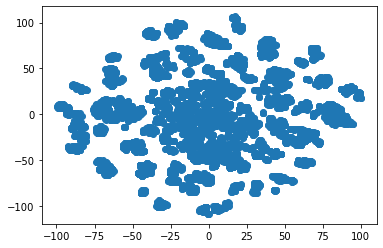

In [24]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

# Clusterization

In [25]:
from sklearn.cluster import KMeans

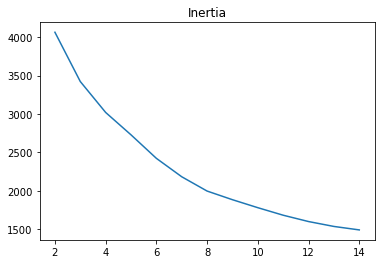

In [26]:
inertias = []
k = 15

for i in range(2, k):
    temp_model = KMeans(n_clusters=i, random_state=42)
    temp_model.fit(X_train_scaled)
    
    temp_inertia = temp_model.inertia_
    
    inertias.append(temp_inertia)

plt.plot(range(2, k), inertias)

plt.title('Inertia')

plt.show()

In [27]:
num_of_clusters = 8
model = KMeans(n_clusters=num_of_clusters, random_state=42)
# model = KMeans(n_clusters=num_of_clusters)

In [28]:
X_train_labels = model.fit_predict(X_train_scaled)

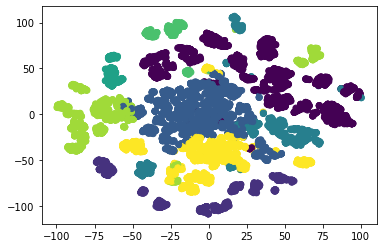

In [29]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=X_train_labels)

plt.show()

### Add cluster mean price

In [30]:
X_train_cl = X_train.copy()
X_train_cl['Cluster'] = X_train_labels
med_price_by_cluster = X_train_cl.groupby(['Cluster'], as_index=False).agg({'Price':'sum', 'Square':'sum'})
med_price_by_cluster['ClusterMeterPrice'] = med_price_by_cluster['Price'] / med_price_by_cluster['Square']
med_price_by_cluster.drop('Price', axis=1, inplace=True)
med_price_by_cluster.drop('Square', axis=1, inplace=True)
X_train_cl

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,KitchenSquare_relative,MedMeterPriceByDistr,Price,Cluster
0,2.0,48.812195,34.679779,5.0,5.0,5.0,1963,0.034331,1,25,5487,3,0,4,1,0.102433,4062.599773,181530.459031,2
1,3.0,81.103039,49.310278,8.0,4.0,4.0,1960,0.298205,1,16,4048,3,1,3,1,0.098640,4291.717138,260456.004692,3
2,3.0,82.882978,3.977650,3.0,8.0,17.0,1977,0.243205,1,5,1564,0,0,0,1,0.036196,2866.703578,219945.304640,0
3,1.0,33.863324,29.993297,3.0,4.0,4.0,1977,0.034656,1,0,168,0,0,0,1,0.088591,2239.484158,66883.280318,0
4,1.0,43.095135,32.781260,3.0,10.0,17.0,1977,0.371149,1,34,7065,1,2,5,1,0.069613,3022.772701,114086.065201,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.0,62.219340,59.219340,3.0,2.0,2.0,2015,0.000078,1,22,6398,141,3,23,1,0.048217,2682.328278,150136.610509,5
9996,3.0,85.790813,32.781260,3.0,9.0,25.0,2018,0.069753,1,53,13670,4,1,11,1,0.034969,4037.498945,328680.869407,6
9997,3.0,83.225854,32.781260,3.0,13.0,17.0,1977,0.007122,1,1,264,0,0,1,1,0.036046,3175.209200,255102.406709,0
9998,3.0,51.354934,36.538453,5.0,1.0,9.0,1973,0.127376,1,43,8429,3,3,9,1,0.097362,4176.484709,182236.048759,7


# Add new features based on clusters

### Classification

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [32]:
scaler.fit(X_test)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_test_scaled

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,KitchenSquare_relative,MedMeterPriceByDistr
0,0.4,0.218413,0.201732,0.053360,0.111111,0.132653,0.571429,0.594403,1.0,0.148649,0.136400,0.007092,0.000000,0.000000,1.0,0.104358,0.171765
1,0.4,0.305683,0.197800,0.026569,0.000000,0.000000,0.616071,0.145207,1.0,0.081081,0.067090,0.021277,0.000000,0.086957,1.0,0.025995,0.213529
2,0.2,0.055023,0.009641,0.106944,0.022222,0.040816,0.008929,0.000000,1.0,0.405405,0.389638,0.617021,0.833333,0.217391,1.0,0.880367,0.806507
3,0.4,0.322720,0.313408,0.080152,0.466667,0.214286,0.883929,0.195208,1.0,0.310811,0.233413,0.021277,0.500000,0.130435,1.0,0.107337,0.318644
4,0.2,0.207806,0.261798,0.026569,0.355556,0.163265,0.973214,0.138268,1.0,0.027027,0.024372,0.007092,0.000000,0.000000,0.0,0.046163,0.139573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.6,0.296095,0.306584,0.053360,0.088889,0.081633,0.580357,0.000325,1.0,0.486486,0.307904,0.000000,0.166667,0.043478,1.0,0.072890,0.309932
4996,0.2,0.174805,0.131583,0.089083,0.244444,0.163265,0.973214,0.013648,1.0,0.013514,0.005075,0.000000,0.000000,0.043478,1.0,0.235167,0.200626
4997,0.6,0.344314,0.291335,0.080152,0.466667,0.214286,0.723214,0.173989,1.0,1.000000,1.000000,0.014184,0.833333,0.652174,1.0,0.099610,0.318433
4998,0.4,0.359908,0.197800,0.026569,0.066667,0.122449,0.616071,0.138268,1.0,0.027027,0.024372,0.007092,0.000000,0.000000,0.0,0.019464,0.134398


In [33]:
k_values = 5

clf = KNeighborsClassifier(n_neighbors=k_values)
    
X_ts = X_train_scaled.drop('Price', axis=1)
clf.fit(X_ts, X_train_labels)
    
Cluster_pred = clf.predict(X_test_scaled)

X_test_classes = X_test.copy()
X_test_classes['Cluster'] =  Cluster_pred
X_test_classes

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,KitchenSquare_relative,MedMeterPriceByDistr,Cluster
0,2.0,49.882643,33.432782,6.0,6.0,14.0,1972,0.310199,1,11,2748,1,0,0,1,0.120282,2957.990008,3
1,2.0,69.263183,32.781260,3.0,1.0,1.0,1977,0.075779,1,6,1437,3,0,2,1,0.043313,3272.322491,0
2,1.0,13.597819,1.597819,12.0,2.0,5.0,1909,0.000000,1,30,7538,87,5,5,1,0.882494,7735.224377,7
3,2.0,73.046609,51.940842,9.0,22.0,22.0,2007,0.101872,1,23,4583,3,3,3,1,0.123209,4063.439258,7
4,1.0,47.527111,43.387569,3.0,17.0,17.0,2017,0.072158,1,2,629,1,0,0,0,0.063122,2715.704541,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3.0,67.133911,50.809797,6.0,5.0,9.0,1973,0.000170,1,36,5992,0,1,1,1,0.089374,3997.872947,2
4996,1.0,40.198472,21.807061,10.0,12.0,17.0,2017,0.007122,1,1,264,0,0,1,1,0.248766,3175.209200,0
4997,3.0,77.842178,48.282625,9.0,22.0,22.0,1989,0.090799,1,74,19083,2,5,15,1,0.115619,4061.853520,6
4998,2.0,81.305222,32.781260,3.0,4.0,13.0,1977,0.072158,1,2,629,1,0,0,0,0.036898,2676.756431,1


# Prediction with cluster information

In [34]:
y = X_train_cl['Price'].copy()
X = X_train_cl.copy()
X.drop('Price', axis=1, inplace=True)
X = pd.merge(X, med_price_by_cluster, on='Cluster', how='left')
X.drop('Cluster', axis=1, inplace=True)

X

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,KitchenSquare_relative,MedMeterPriceByDistr,ClusterMeterPrice
0,2.0,48.812195,34.679779,5.0,5.0,5.0,1963,0.034331,1,25,5487,3,0,4,1,0.102433,4062.599773,4371.439346
1,3.0,81.103039,49.310278,8.0,4.0,4.0,1960,0.298205,1,16,4048,3,1,3,1,0.098640,4291.717138,3750.912840
2,3.0,82.882978,3.977650,3.0,8.0,17.0,1977,0.243205,1,5,1564,0,0,0,1,0.036196,2866.703578,2766.243435
3,1.0,33.863324,29.993297,3.0,4.0,4.0,1977,0.034656,1,0,168,0,0,0,1,0.088591,2239.484158,2766.243435
4,1.0,43.095135,32.781260,3.0,10.0,17.0,1977,0.371149,1,34,7065,1,2,5,1,0.069613,3022.772701,3750.912840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.0,62.219340,59.219340,3.0,2.0,2.0,2015,0.000078,1,22,6398,141,3,23,1,0.048217,2682.328278,3359.264554
9996,3.0,85.790813,32.781260,3.0,9.0,25.0,2018,0.069753,1,53,13670,4,1,11,1,0.034969,4037.498945,4231.165446
9997,3.0,83.225854,32.781260,3.0,13.0,17.0,1977,0.007122,1,1,264,0,0,1,1,0.036046,3175.209200,2766.243435
9998,3.0,51.354934,36.538453,5.0,1.0,9.0,1973,0.127376,1,43,8429,3,3,9,1,0.097362,4176.484709,4619.760615


In [35]:
model = CatBoostRegressor(silent=True, learning_rate=0.1, iterations=1000, eval_metric='R2', depth=8, random_state=42)
r2_median = cross_validation(X, y, model)
r2_median

0.7609907631752535

### Train on whole dataset with clusters 

In [36]:
X_test_valid = pd.merge(X_test_classes, med_price_by_cluster, on='Cluster', how='left')
X_test_valid.drop('Cluster', axis=1, inplace=True)
X_test_valid

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,KitchenSquare_relative,MedMeterPriceByDistr,ClusterMeterPrice
0,2.0,49.882643,33.432782,6.0,6.0,14.0,1972,0.310199,1,11,2748,1,0,0,1,0.120282,2957.990008,3750.912840
1,2.0,69.263183,32.781260,3.0,1.0,1.0,1977,0.075779,1,6,1437,3,0,2,1,0.043313,3272.322491,2766.243435
2,1.0,13.597819,1.597819,12.0,2.0,5.0,1909,0.000000,1,30,7538,87,5,5,1,0.882494,7735.224377,4619.760615
3,2.0,73.046609,51.940842,9.0,22.0,22.0,2007,0.101872,1,23,4583,3,3,3,1,0.123209,4063.439258,4619.760615
4,1.0,47.527111,43.387569,3.0,17.0,17.0,2017,0.072158,1,2,629,1,0,0,0,0.063122,2715.704541,3217.272111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3.0,67.133911,50.809797,6.0,5.0,9.0,1973,0.000170,1,36,5992,0,1,1,1,0.089374,3997.872947,4371.439346
4996,1.0,40.198472,21.807061,10.0,12.0,17.0,2017,0.007122,1,1,264,0,0,1,1,0.248766,3175.209200,2766.243435
4997,3.0,77.842178,48.282625,9.0,22.0,22.0,1989,0.090799,1,74,19083,2,5,15,1,0.115619,4061.853520,4231.165446
4998,2.0,81.305222,32.781260,3.0,4.0,13.0,1977,0.072158,1,2,629,1,0,0,0,0.036898,2676.756431,3217.272111


In [37]:
model.fit(X, y)

### Prediction with clusters

In [38]:
y_pred_cl = model.predict(X_test_valid)

### Save predicted with clusters

In [39]:
ss_df = pd.DataFrame({
    "Id": test_df["Id"],
    "Price": y_pred_cl,
})

ss_df.head(10)

,Id,Price
0,725,155161.373841
1,15856,227075.256392
2,5480,323111.126351
3,15664,339105.705568
4,14275,147693.114958
5,7633,228247.084310
6,13329,172837.641738
7,5502,233491.009481
8,4220,295456.090837
9,11538,191596.027276


In [40]:
ss_df.to_csv("sample_submission_ermnik_with_clusters.csv", sep=",", index=False)

### Features importance (with clusters info)

In [41]:
importances = model.feature_importances_

importance = pd.Series(importances, index=X_test_valid.columns)
importance

Rooms                      2.313895
Square                    26.325046
LifeSquare                 4.494669
KitchenSquare              4.007199
Floor                      4.075096
HouseFloor                 4.222190
HouseYear                  7.911007
Ecology_1                  4.553999
Ecology_3                  0.118059
Social_1                   2.422617
Social_2                   3.148141
Social_3                   3.430673
Helthcare_2                1.600044
Shops_1                    2.127140
Shops_2                    0.091067
KitchenSquare_relative     4.390433
MedMeterPriceByDistr      22.415458
ClusterMeterPrice          2.353266
dtype: float64